In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [32]:
#a)
#Your code:
df = pd.read_csv("kc_house_data.csv")
print(df.head())

#Hint: read_csv(), head()

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

In [33]:
#b) 

house_categorical_df = df.select_dtypes(include=['object', 'category'])
house_numerical_df = df.select_dtypes(include=['number'])
print(house_categorical_df)
print(house_numerical_df)


                  date
0      20141013T000000
1      20141209T000000
2      20150225T000000
3      20141209T000000
4      20150218T000000
...                ...
21608  20140521T000000
21609  20150223T000000
21610  20140623T000000
21611  20150116T000000
21612  20141015T000000

[21613 rows x 1 columns]
               id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0         3       1.00         1180      5650   
1      6414100192  538000.0         3       2.25         2570      7242   
2      5631500400  180000.0         2       1.00          770     10000   
3      2487200875  604000.0         4       3.00         1960      5000   
4      1954400510  510000.0         3       2.00         1680      8080   
...           ...       ...       ...        ...          ...       ...   
21608   263000018  360000.0         3       2.50         1530      1131   
21609  6600060120  400000.0         4       2.50         2310      5813   
21610  1523300141  4021

In [34]:
#c)
#Your code:
print(df.describe())


#Hint: Function describe()

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

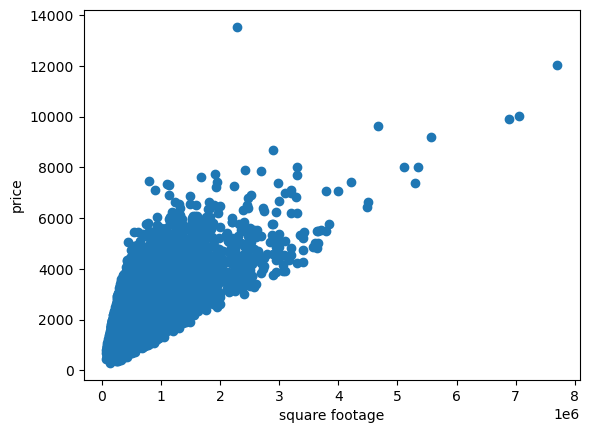

In [35]:
#a)
#Your code:
plt.scatter(df["price"], df["sqft_living"])
plt.xlabel("square footage")
plt.ylabel("price")
plt.show()
#Hint plt.scatter

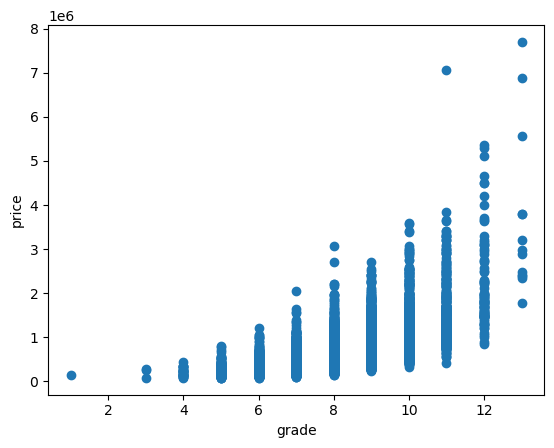

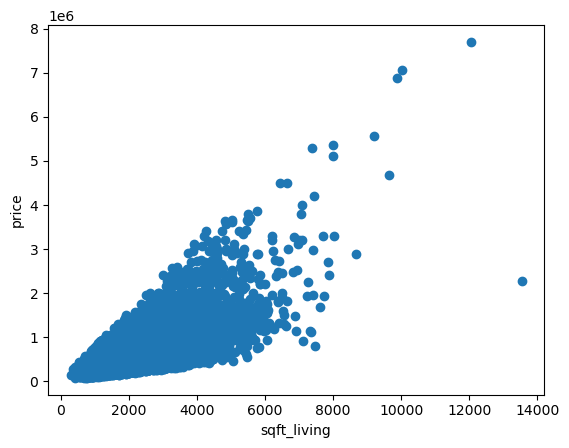

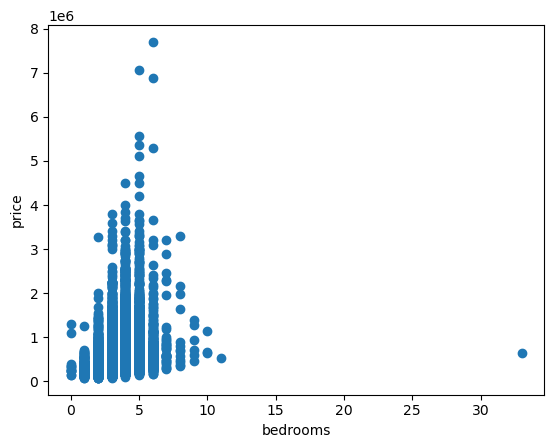

In [88]:
#b)
#Your code:
plt.scatter(df["grade"], df["price"])
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

plt.scatter(df["sqft_living"], df["price"])
plt.xlabel("sqft_living")
plt.ylabel("price")
plt.show()

plt.scatter(df["bedrooms"], df["price"])
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()

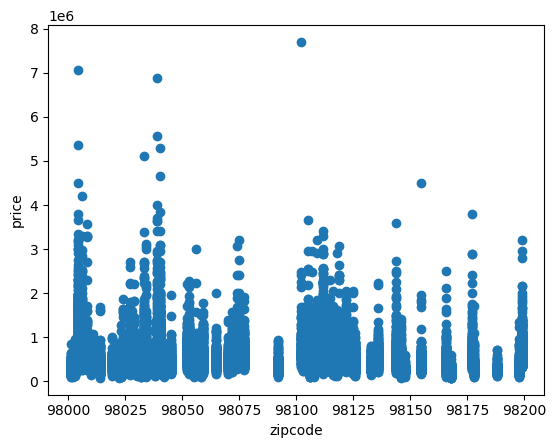

In [37]:
#c)
#Your code:
plt.scatter(df["zipcode"], df["price"])
plt.xlabel("zipcode")
plt.ylabel("price")
plt.show()

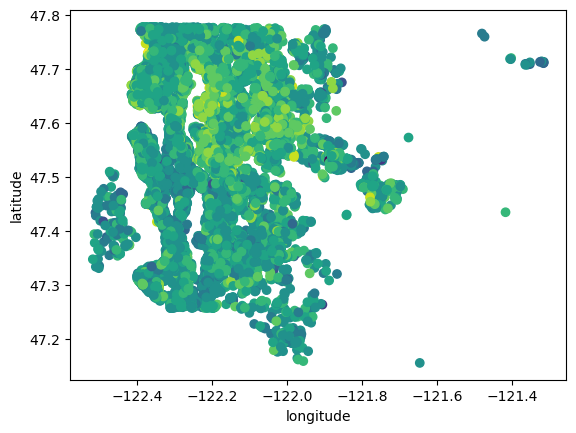

In [38]:
#Your code:
plt.scatter(df['long'], df['lat'],c=df['grade'],cmap='viridis')
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()


## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

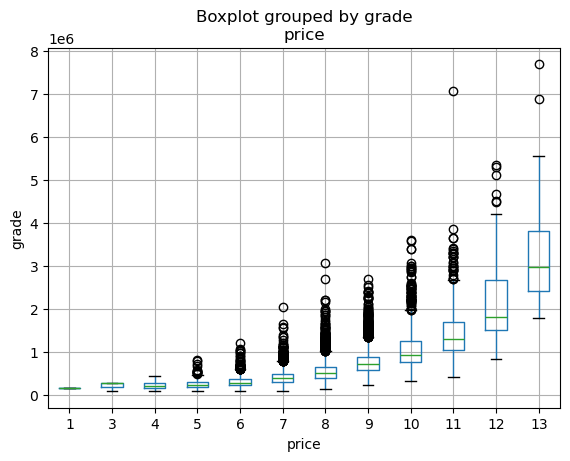

In [51]:
#a)
#Your code:
df.boxplot(column='price', by='grade')
plt.xlabel("price")
plt.ylabel("grade")
plt.show()

#Hint: plt.boxplot


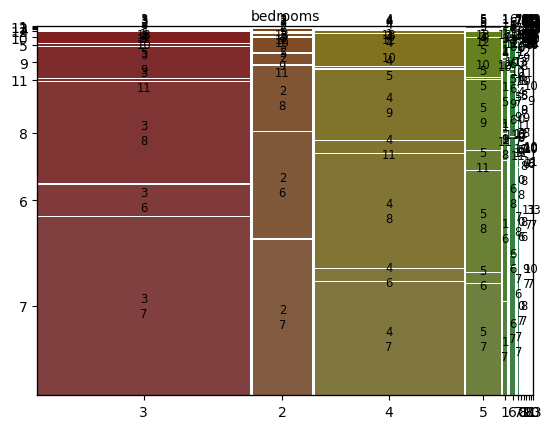

In [50]:
#b)
from statsmodels.graphics.mosaicplot import mosaic
mosaic(df, ['bedrooms', 'grade'])
plt.xlabel("bedrooms")
plt.ylabel("price")
plt.show()



## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [56]:
#a)
#Your code:
accepted = df.loc[(df["bedrooms"]==3) & (df["bathrooms"]==2) & (df["floors"]==2)]
print(accepted.describe())
#Hint: pandas.DataFrame.loc

                 id         price  bedrooms  bathrooms  sqft_living  \
count  1.540000e+02  1.540000e+02     154.0      154.0   154.000000   
mean   4.397177e+09  5.144986e+05       3.0        2.0  1850.279221   
std    2.849813e+09  2.497661e+05       0.0        0.0   547.585413   
min    7.600057e+06  2.090000e+05       3.0        2.0  1020.000000   
25%    2.060901e+09  3.769750e+05       3.0        2.0  1452.500000   
50%    3.630010e+09  4.640000e+05       3.0        2.0  1700.000000   
75%    7.184074e+09  5.894625e+05       3.0        2.0  2127.500000   
max    9.829200e+09  1.755000e+06       3.0        2.0  3650.000000   

            sqft_lot  floors  waterfront        view   condition       grade  \
count     154.000000   154.0  154.000000  154.000000  154.000000  154.000000   
mean    23678.948052     2.0    0.006494    0.357143    3.435065    7.551948   
std     83324.024708     0.0    0.080582    0.919495    0.713322    0.832684   
min       700.000000     2.0    0.000000

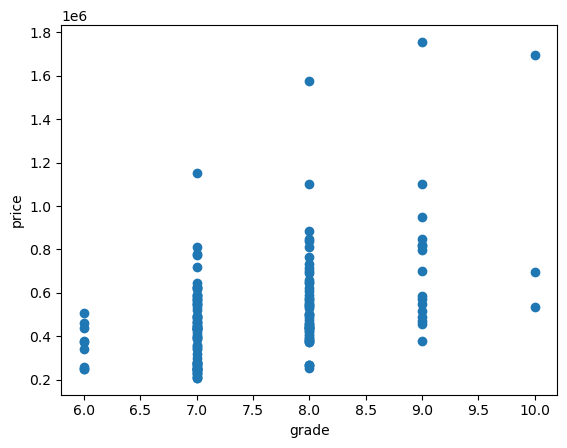

               id             date     price  bedrooms  bathrooms  \
18262  2891000610  20141211T000000  148900.0         4       1.75   
3785    723049156  20140523T000000  149000.0         3       1.00   
13825  5637200450  20141017T000000  257000.0         5       2.75   
17197  5111400086  20140512T000000  110000.0         3       1.00   
1385   3342700465  20150123T000000  250000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
18262         1700      6000     1.0           0     0  ...      7   
3785          1700      8645     1.0           0     0  ...      6   
13825         2930     10148     2.0           0     0  ...      9   
17197         1250     53143     1.0           0     0  ...      6   
1385          2840     10182     1.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18262        1700              0      1967             0    98002  47.3252   
3785    

In [83]:
#b)
#Your code:
plt.scatter(accepted["grade"], accepted["price"])
plt.xlabel("grade")
plt.ylabel("price")
plt.show()

In [84]:
#c)
#Your code:

res = (df["price"]/df["sqft_living"]).sort_values()
result = res.head()
print(df.loc[result.index])

#Hint: .loc, .sort_values(), .index

               id             date     price  bedrooms  bathrooms  \
18262  2891000610  20141211T000000  148900.0         4       1.75   
3785    723049156  20140523T000000  149000.0         3       1.00   
13825  5637200450  20141017T000000  257000.0         5       2.75   
17197  5111400086  20140512T000000  110000.0         3       1.00   
1385   3342700465  20150123T000000  250000.0         3       1.50   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
18262         1700      6000     1.0           0     0  ...      7   
3785          1700      8645     1.0           0     0  ...      6   
13825         2930     10148     2.0           0     0  ...      9   
17197         1250     53143     1.0           0     0  ...      6   
1385          2840     10182     1.0           0     0  ...      8   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
18262        1700              0      1967             0    98002  47.3252   
3785    